# Cluster não-hierárquico

### Processo define a priore a quantidade de clusters que serão criados, 
### Esse metodo é mais objetivo e baseia-se na minimização

# 01 - Passo: Instalando os pacotes

In [45]:
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install seaborn
# pip install plotly
# pip install scipy
# pip install scikit-learn
# pip install pingouin

# 02 - Passo: Importando os pacotes

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.io as pio
pio.renderers.default='browser'

# 03 - Passos: Importando o banco de dados

In [47]:
dados_vest = pd.read_excel('vestibular.xlsx')
dados_vest

,estudante,matemática,física,química
0,Gabriela,3.7,2.7,9.1
1,Luiz Felipe,7.8,8.0,1.5
2,Patrícia,8.9,1.0,2.7
3,Ovídio,7.0,1.0,9.0
4,Leonor,3.4,2.0,5.0


# 04 - Selecionado apenas variáveis métricas da Base

In [48]:
vest = dados_vest.drop(columns=['estudante'])
vest

,matemática,física,química
0,3.7,2.7,9.1
1,7.8,8.0,1.5
2,8.9,1.0,2.7
3,7.0,1.0,9.0
4,3.4,2.0,5.0


# 05 - Criando o Clusters com KMeans
### Considerando que identificamos 3 possíveis clusters na análise hierárquica

In [49]:
# n_clusters=3: como no metodo hierarciquico ja tinhamos indetificado 3 cluster, 
#               vou seguir com esse parametro

# random_state=100: Apenas para consguir replicar como mesmo valores porem podemos 
#                   esclher 100, 10, 5, qualquer valor, mas para consguir replicar 
#                   tem que ser o valor imputado anteriormente

kmeans = KMeans(n_clusters=3, init='random', random_state=100).fit(vest)

# Gerando a variável para identificarmos os clusters gerados
kmeans_clusters = kmeans.labels_
dados_vest['cluster_kmeans'] = kmeans_clusters
dados_vest['cluster_kmeans'] = dados_vest['cluster_kmeans'].astype('category')

dados_vest

,estudante,matemática,física,química,cluster_kmeans
0,Gabriela,3.7,2.7,9.1,2
1,Luiz Felipe,7.8,8.0,1.5,1
2,Patrícia,8.9,1.0,2.7,0
3,Ovídio,7.0,1.0,9.0,2
4,Leonor,3.4,2.0,5.0,2


# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
# |||||| ANALISES APARTES |||||
### - Identificando as coordenadas centroides dos clusters finais
# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [50]:
cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = vest.columns
cent_finais.index.name = 'cluster'
cent_finais

,matemática,física,química
cluster,,,
0,8.9,1.0,2.7
1,7.8,8.0,1.5
2,4.7,1.9,7.7


### - Plotando as observações e seus centroides dos clusters

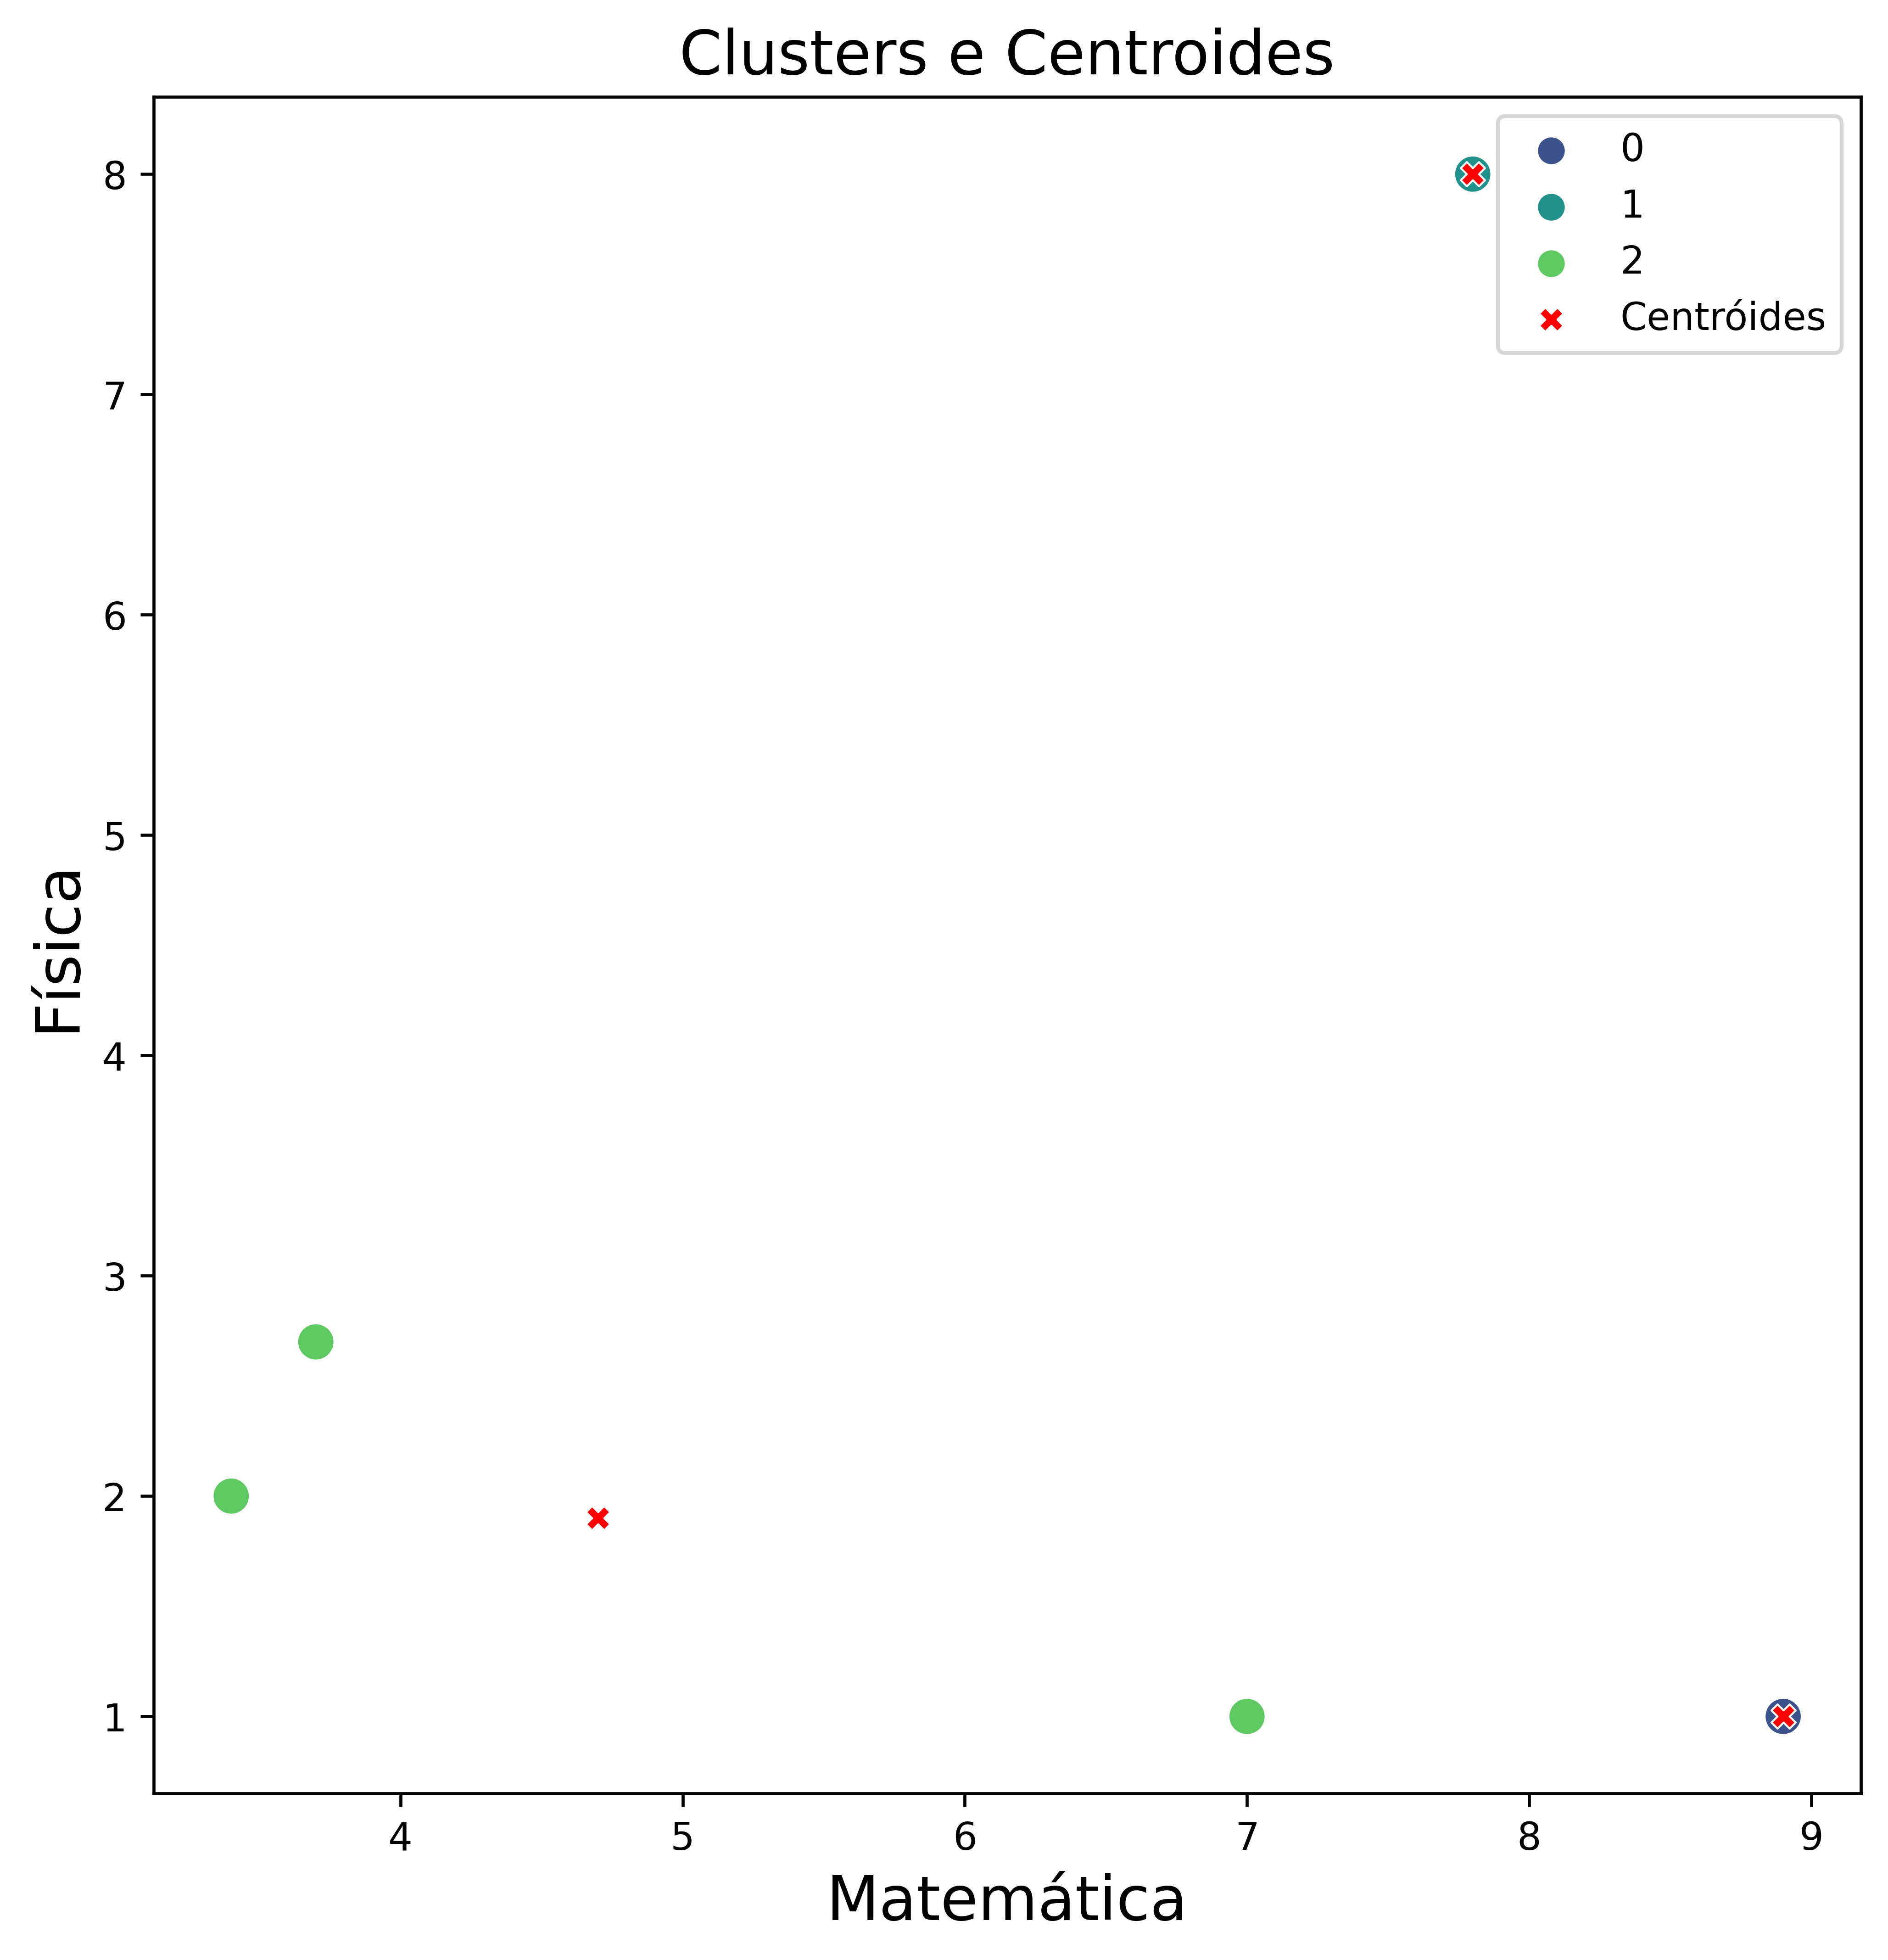

In [51]:
plt.figure(figsize=(8,8), dpi=600)
sns.scatterplot(data=dados_vest, x='matemática', y='física', hue='cluster_kmeans', palette='viridis', s=100)
sns.scatterplot(data=cent_finais, x='matemática', y='física', c='red', label='Centróides', marker="X", s=40)
plt.title('Clusters e Centroides', fontsize=16)
plt.xlabel('Matemática', fontsize=16)
plt.ylabel('Física', fontsize=16)
plt.legend()
plt.show()

### - Identificação da quantidade de clusters


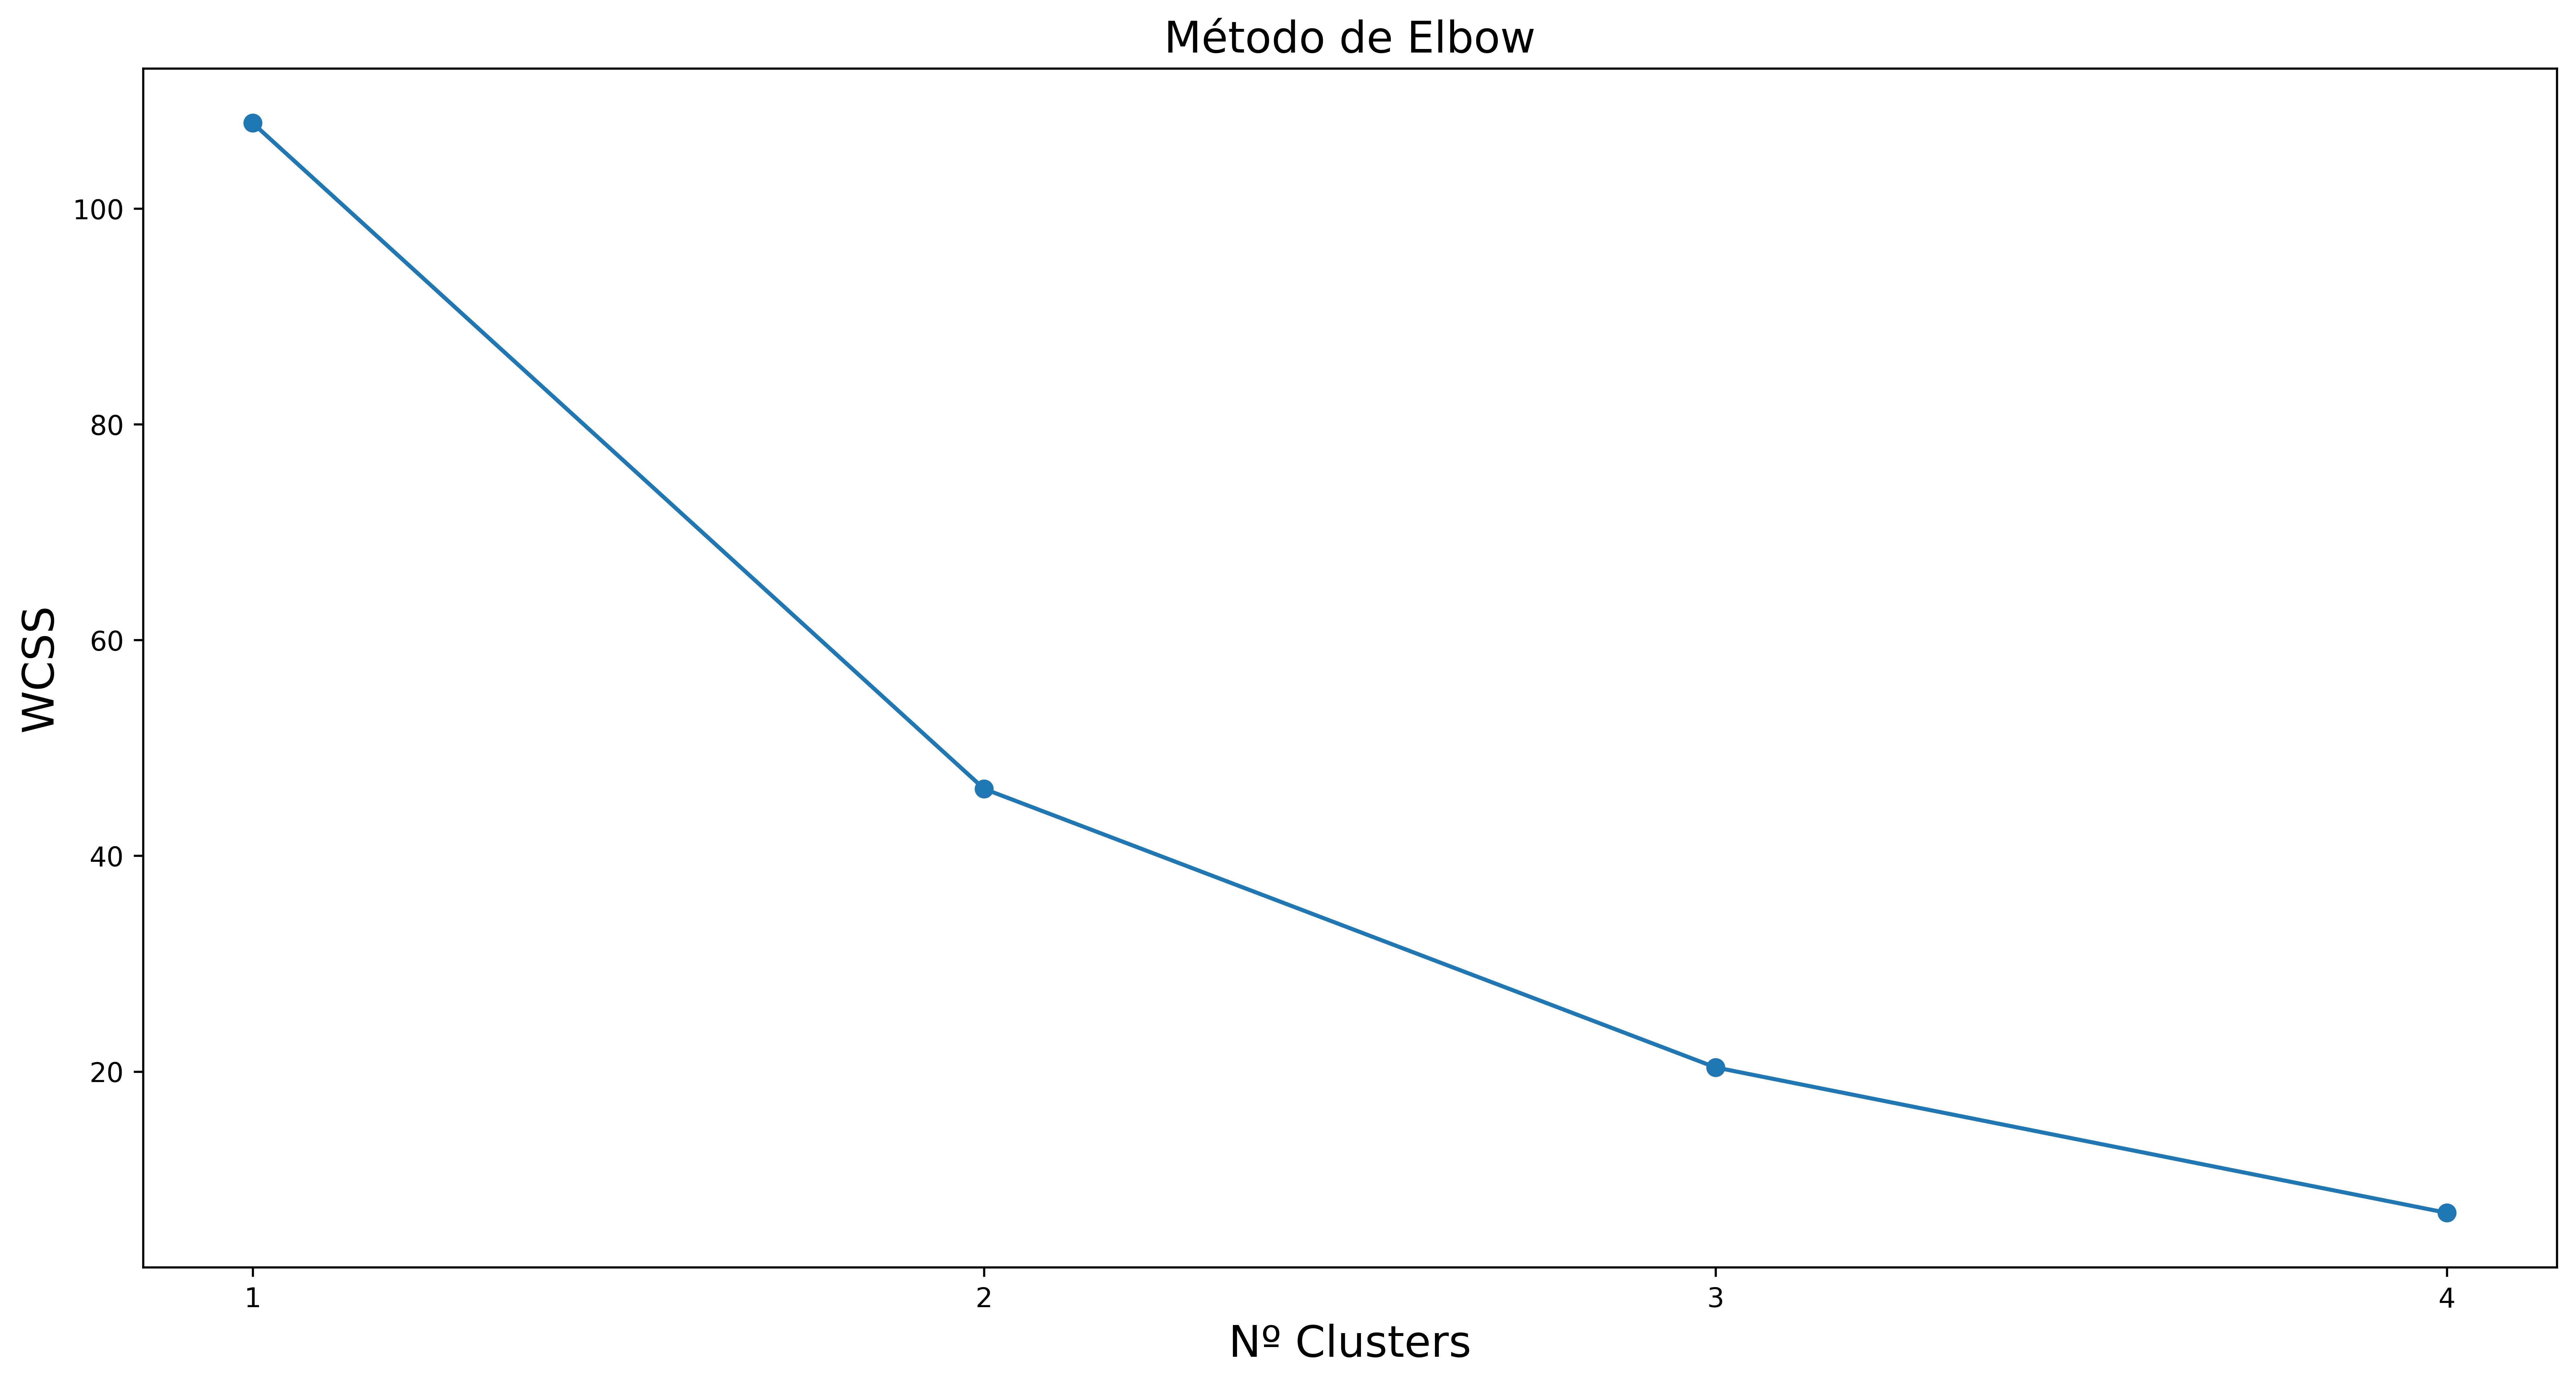

In [52]:
#%% Identificação da quantidade de clusters

# Método Elbow para identificação do nº de clusters
## Elaborado com base na "WCSS": distância das observações para o centroide de seu cluster
## Quanto mais próximas do centroide, menores as distâncias internas
## Normalmente, busca-se o "cotovelo", ou seja, o ponto onde a curva "dobra"

elbow = []
K = range(1,5) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(vest)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(16,8), dpi=600)
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,5)) # ajustar de acordo com o range de K definido acima
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()